# Contextual Bandits data

## Load data

In [1]:
from estimate import estimate
import os
output_file_path="test_data/"
input_files = ["test_data/cb/01.csv"]
config = {
   'policies': {'random': ['snips'], 'baseline1': ['ips']},
   'aggregation': {'num_of_events': 10}
}
df = estimate(input_files, config, output_path=output_file_path)

## Apply estimators

In [2]:
import pandas as pd
df = pd.read_csv("test_data/cb.aggregated")
print(df.head())

   Unnamed: 0  random_snips  baseline1_ips
0           0           0.2            1.0
1           1           0.3            0.0
2           2           0.5            0.5
3           3           0.3            0.5
4           4           0.1            0.0


## Visualize

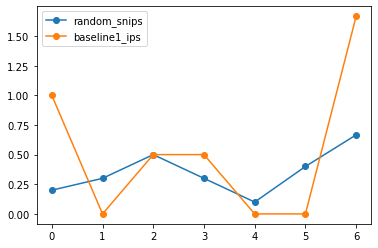

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for index in range(1, len(df.columns)):
    estimate = df[df.columns[index]]
    plt.plot(estimate, "-o", label=df.columns.values[index])
plt.legend(loc="upper left")

## Reaggregate (if needed)

In [ ]:
df = df.resample('10min').sum()
df

## Visualize

In [ ]:
df.apply(lambda r: r['random'].get('snips'), axis=1).plot(label='random')
df.apply(lambda r: r['baseline1'].get('snips'), axis=1).plot(label='baseline1')

plt.legend(loc='best')

# Conditional Contextual Bandits

In [ ]:
import pandas as pd

df = pd.read_pickle(r'test_data\ccb\01.pickle')
df.head()